###**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

###**Loading the data**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Udemy Projects/Black Friday Sale/train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


Data contains 5.5L rows across 12 columns , **Purchase** variable has to be predicted

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

**Product_Category_1 , Product_Category_2** are the only 2 columns containing null values

###**Visualization**

<ipython-input-9-85448903f5fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Gender",palette='mako')


<Axes: xlabel='Gender', ylabel='count'>

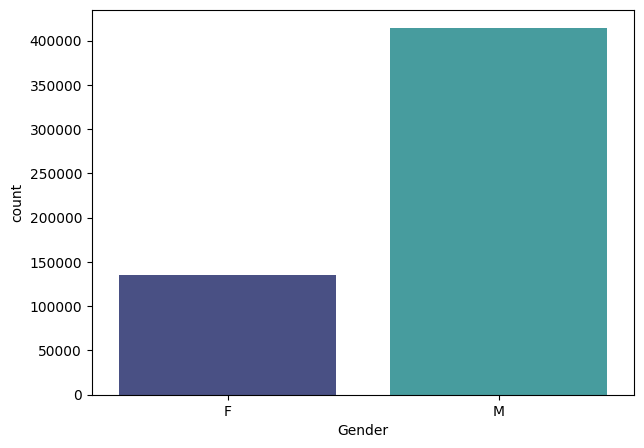

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="Gender",palette='mako')

Count of males are higher than females

<ipython-input-12-5dc2297db149>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Occupation",y="Purchase",palette="mako")


<Axes: xlabel='Occupation', ylabel='Purchase'>

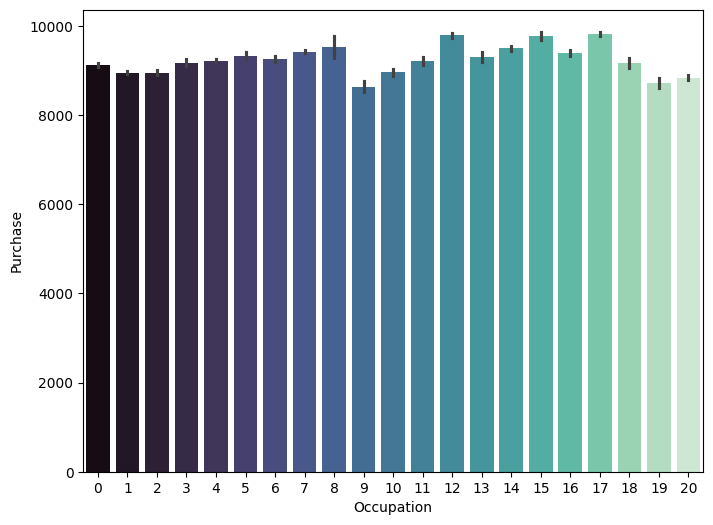

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="Occupation",y="Purchase",palette="mako")

Occupation **8,12,15 and 17** have higher purchases

<Axes: xlabel='Occupation', ylabel='Purchase'>

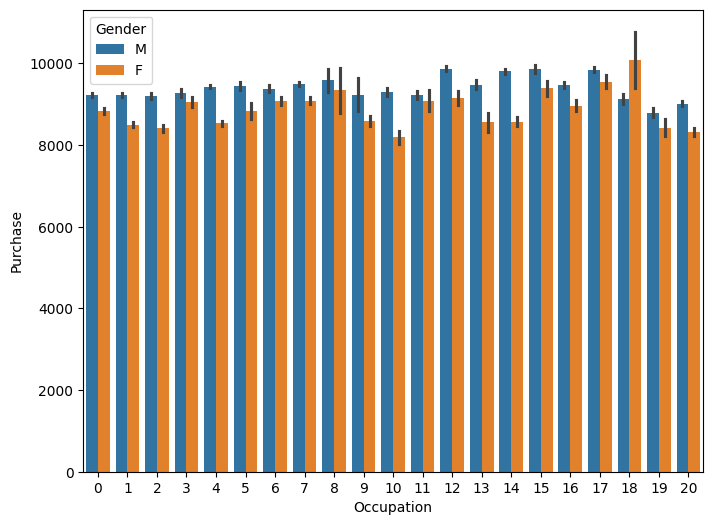

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='Occupation',y='Purchase',hue='Gender')

Only for Occupation **18** ,Females have higher purchases than males

<Axes: xlabel='Occupation', ylabel='Purchase'>

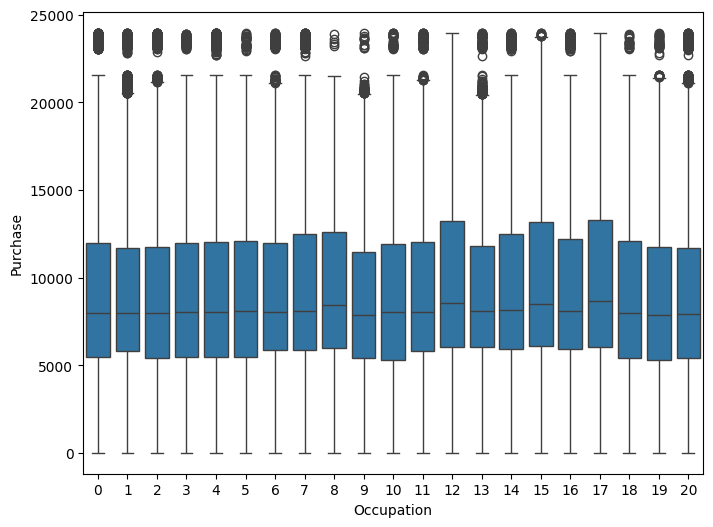

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Occupation",y="Purchase")

Purchases beyond 20,000 can be treated as outliers

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

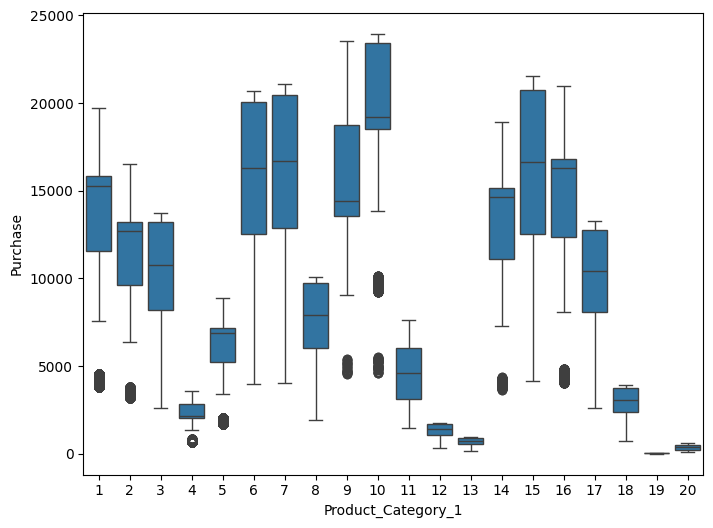

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Product_Category_1",y="Purchase")

###**Pre-Processing**

In [16]:
df['Product_ID']=df['Product_ID'].str.replace('P00', '')
scale=StandardScaler()
df["Product_ID"]=scale.fit_transform(df['Product_ID'].values.reshape(-1,1))

Replacing the 'P00' with no value and scaling the **ProductID** column

In [17]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

We drop this column, since >50% values are null

In [18]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

impute the other product category column with mean values

In [19]:
categorical_columns=['Gender','City_Category','Age']
le=LabelEncoder()
for i in categorical_columns:
  df[i]=le.fit_transform(df[i])
df.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

Label encoding converts all categorical columns to numerical variables for better computation

In [20]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

All the **'4+'** values in this specific column has been changed to **'4'**

In [22]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['City_Category']=df['City_Category'].astype('category')

Following columns are changed to integer type except the **city_category** column, which is converted to category type

In [23]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.028774,0,0,10,0,2,0,3,9.842329,8370
1,1000001,0.722139,0,0,10,0,2,0,1,6.000000,15200
2,1000001,-0.845799,0,0,10,0,2,0,12,9.842329,1422
3,1000001,-0.869157,0,0,10,0,2,0,12,14.000000,1057
4,1000002,1.077382,1,6,16,2,4,0,8,9.842329,7969
5,1000003,0.182947,1,2,15,0,3,0,1,2.000000,15227
6,1000004,0.099246,1,4,7,1,2,1,1,8.000000,19215
7,1000004,1.668157,1,4,7,1,2,1,1,15.000000,15854
8,1000004,-0.754312,1,4,7,1,2,1,1,16.000000,15686
9,1000005,0.975189,1,2,20,0,1,1,8,9.842329,7871


###**Distribution Plot**

<ipython-input-25-8ba479560bf8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-25-8ba479560bf8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-25-8ba479560bf8>:8: UserWarning: 

`distplot` is a deprecated f

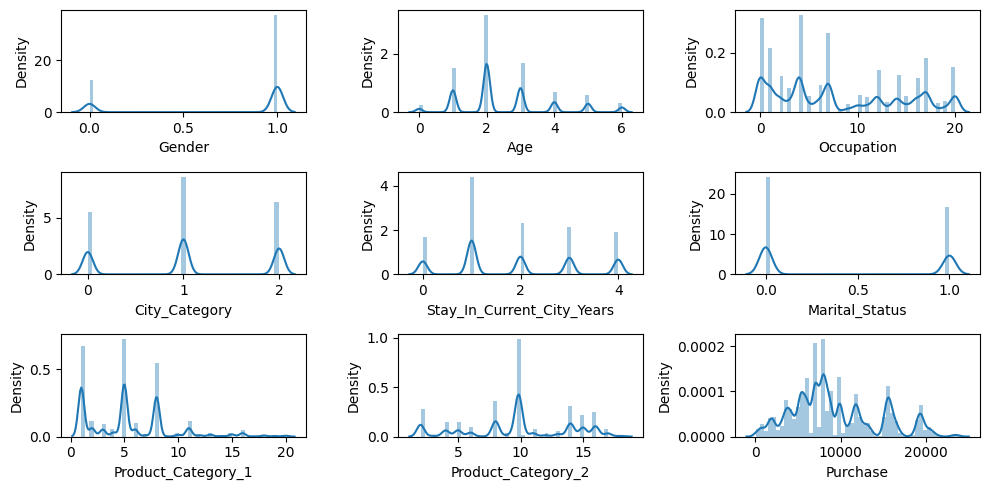

In [25]:
rows=3
cols=3
fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(10,5))
col=df.columns
index=2
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]],ax=ax[i][j])
    index+=1
plt.tight_layout()

Helps us to detect the skewness of the data, **Skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [26]:
df['Purchase']=np.log(df['Purchase'])

**Log-transformation** used to transform skewed data to approximately conform to normality. If the original distribution follows a log-normal distribution , then log-transformed data follows a normal distribution

In [27]:
df=pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


**get_dummies()** is used to convert categorical variable to dummy/numerical variable

###**Train-Test split**

In [29]:
X=df.drop(labels='Purchase',axis=1)
y=df['Purchase']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

Standardizes a feature by substracting the mean and then scaling to unit variance

###**Linear Regression**

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
predictions= model.predict(X_test)

make predictions based on the test set

In [41]:
r_2=r2_score(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('R_2 score',r_2)
print("MAE",mae)
print("MSE",mse)
print('RMSE',rmse)

R_2 score 0.19627389085642422
MAE 0.4540864174365607
MSE 0.438992283000665
RMSE 0.6625649273849809


Since **R_2 score** is only 0.19 and **RMSE** is high, this particular model is not very accurate in predicting the purchases/target column

###**Decision Tree**

In [57]:
model=DecisionTreeRegressor(max_depth=9)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [58]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

predictions based on training and test data

In [59]:
from sklearn import metrics
RMSE_train= np.sqrt(metrics.mean_squared_error(y_train,train_pred))
RMSE_test= np.sqrt(metrics.mean_squared_error(y_test,test_pred))
print("Training RMSE",RMSE_train)
print("Test RMSE",RMSE_test)
print("Training R2",r2_score(y_train,train_pred))
print("Test R2",r2_score(y_test,test_pred))

Training RMSE 0.36748607106053494
Test RMSE 0.37001394822395495
Training R2 0.7539376158232269
Test R2 0.7493386454215529


Decision Tree model is comparatively better since , **R2_Score** is comparatively high and **RMSE** is lower

###**Random Forest**

In [75]:
model=RandomForestRegressor()

In [76]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [78]:
from sklearn import metrics
RMSE_train= np.sqrt(metrics.mean_squared_error(y_train,train_pred))
RMSE_test= np.sqrt(metrics.mean_squared_error(y_test,test_pred))
print("Training RMSE",RMSE_train)
print("Test RMSE",RMSE_test)
print("Training R2",r2_score(y_train,train_pred))
print("Test R2",r2_score(y_test,test_pred))

Training RMSE 0.1314645748278679
Test RMSE 0.35296497494670664
Training R2 0.9685093993058476
Test R2 0.7719057092583752


**Random Forest** model is much better than the previous one

In [63]:
df_test=pd.read_csv('/content/drive/MyDrive/Udemy Projects/Black Friday Sale/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [64]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [66]:
df_test['Product_ID']=df_test['Product_ID'].str.replace('P00', '')
scale=StandardScaler()
df_test['Product_ID']=scale.fit_transform(df_test['Product_ID'].values.reshape(-1,1))

In [67]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [68]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [69]:
df_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [70]:
categorical_columns=['Gender','Age','City_Category']
le=LabelEncoder()
for i in categorical_columns:
  df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [71]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')

In [72]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')

In [73]:
df_test=pd.get_dummies(df_test)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


In [74]:
test_pred=model.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: divide by zero encountered in divide
  y_hat /= len(self.estimators_)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:999: RuntimeWarning: invalid value encountered in divide
  y_hat /= len(self.estimators_)


Predictions are made based on the test dataset using the **Random Forest** model, since it gives us the best evaluation metrics.

In [79]:
id_frame=pd.read_csv('/content/drive/MyDrive/Udemy Projects/Black Friday Sale/test.csv')

In [80]:
ID_info=id_frame[["User_ID","Product_ID"]]
ID_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


Concatenating **User ID** and **Product ID** from test set into a single dataframe

In [81]:
predictions=pd.DataFrame(test_pred,columns=['Purchase'])
predictions['User_ID']=ID_info['User_ID']
predictions['Product_ID']=ID_info['Product_ID']
predictions.head()

,Purchase,User_ID,Product_ID
0,9.548443,1000004,P00128942
1,9.599579,1000009,P00113442
2,8.972673,1000010,P00288442
3,8.752463,1000010,P00145342
4,9.500609,1000011,P00053842


Predictions are saved in form of a dataframe

In [82]:
predictions.to_csv('BlackFridayPredictions.csv',index=False)

Final predictions/outputs are converted into CSV file.